In [195]:
!pip install pandas_ta
import pandas_ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
import pandas_datareader.data as web
import yfinance as yf
from statsmodels.regression.rolling import RollingOLS
import warnings
warnings.filterwarnings("ignore")

In [196]:
end_date = '2023-08-27'

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*10)

df = yf.download(tickers = 'AAPL',
                 start=start_date,
                 end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-29,17.558929,17.732143,17.540358,17.560715,15.286457,239657600
2013-08-30,17.571428,17.605356,17.375000,17.400715,15.147185,272297200
2013-09-03,17.610714,17.878571,17.405357,17.449286,15.189459,331928800
2013-09-04,17.841429,17.937143,17.724285,17.810356,15.503775,345032800
2013-09-05,17.866072,17.881430,17.629999,17.688213,15.397449,236367600
...,...,...,...,...,...,...
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.384842,46311900
2023-08-22,177.059998,177.679993,176.250000,177.229996,176.771255,42084200
2023-08-23,178.520004,181.550003,178.330002,181.119995,180.651184,52722800


In [197]:
df.columns = df.columns.str.lower()
df.stack()

Date                 
2013-08-29  open         1.755893e+01
            high         1.773214e+01
            low          1.754036e+01
            close        1.756071e+01
            adj close    1.528646e+01
                             ...     
2023-08-25  high         1.791500e+02
            low          1.758200e+02
            close        1.786100e+02
            adj close    1.781477e+02
            volume       5.144960e+07
Length: 15090, dtype: float64

##Garman Klass Vol

In [198]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)


In [199]:
df

,open,high,low,close,adj close,volume,garman_klass_vol
Date,,,,,,,
2013-08-29,17.558929,17.732143,17.540358,17.560715,15.286457,239657600,-0.007361
2013-08-30,17.571428,17.605356,17.375000,17.400715,15.147185,272297200,-0.008427
2013-09-03,17.610714,17.878571,17.405357,17.449286,15.189459,331928800,-0.008091
2013-09-04,17.841429,17.937143,17.724285,17.810356,15.503775,345032800,-0.007548
2013-09-05,17.866072,17.881430,17.629999,17.688213,15.397449,236367600,-0.008442
...,...,...,...,...,...,...,...
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.384842,46311900,0.000092
2023-08-22,177.059998,177.679993,176.250000,177.229996,176.771255,42084200,0.000032
2023-08-23,178.520004,181.550003,178.330002,181.119995,180.651184,52722800,0.000106


##RSI

In [200]:
#df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
df['rsi'] = pandas_ta.rsi(df['adj close'], length=20)

<Axes: xlabel='Date'>

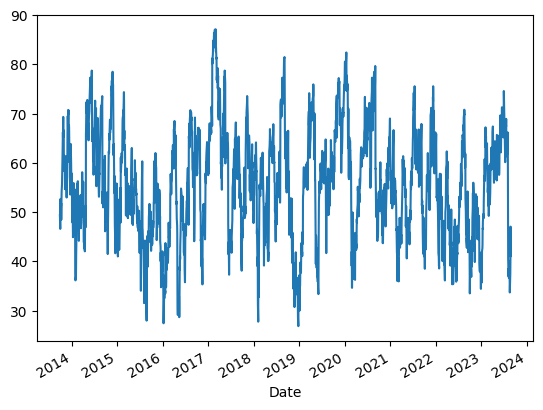

In [201]:
df['rsi'].plot()

##Bollinger Bands (High, Low and Mid)

In [202]:
df['bb_low'] = df['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])

df['bb_mid'] = df['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])

df['bb_high'] = df['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

df

,open,high,low,close,adj close,volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high
Date,,,,,,,,,,,
2013-08-29,17.558929,17.732143,17.540358,17.560715,15.286457,239657600,-0.007361,NaN,NaN,NaN,NaN
2013-08-30,17.571428,17.605356,17.375000,17.400715,15.147185,272297200,-0.008427,NaN,NaN,NaN,NaN
2013-09-03,17.610714,17.878571,17.405357,17.449286,15.189459,331928800,-0.008091,NaN,NaN,NaN,NaN
2013-09-04,17.841429,17.937143,17.724285,17.810356,15.503775,345032800,-0.007548,NaN,NaN,NaN,NaN
2013-09-05,17.866072,17.881430,17.629999,17.688213,15.397449,236367600,-0.008442,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.384842,46311900,0.000092,37.474640,5.129366,5.217367,5.305367
2023-08-22,177.059998,177.679993,176.250000,177.229996,176.771255,42084200,0.000032,40.217905,5.126747,5.213035,5.299323
2023-08-23,178.520004,181.550003,178.330002,181.119995,180.651184,52722800,0.000106,47.060190,5.127495,5.209558,5.291621


##ATR

In [203]:
def get_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'], low=stock_data['low'], close=stock_data['close'], length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = get_atr(df)


In [204]:
df

,open,high,low,close,adj close,volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr
Date,,,,,,,,,,,,
2013-08-29,17.558929,17.732143,17.540358,17.560715,15.286457,239657600,-0.007361,NaN,NaN,NaN,NaN,NaN
2013-08-30,17.571428,17.605356,17.375000,17.400715,15.147185,272297200,-0.008427,NaN,NaN,NaN,NaN,NaN
2013-09-03,17.610714,17.878571,17.405357,17.449286,15.189459,331928800,-0.008091,NaN,NaN,NaN,NaN,NaN
2013-09-04,17.841429,17.937143,17.724285,17.810356,15.503775,345032800,-0.007548,NaN,NaN,NaN,NaN,NaN
2013-09-05,17.866072,17.881430,17.629999,17.688213,15.397449,236367600,-0.008442,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.384842,46311900,0.000092,37.474640,5.129366,5.217367,5.305367,0.915774
2023-08-22,177.059998,177.679993,176.250000,177.229996,176.771255,42084200,0.000032,40.217905,5.126747,5.213035,5.299323,0.856109
2023-08-23,178.520004,181.550003,178.330002,181.119995,180.651184,52722800,0.000106,47.060190,5.127495,5.209558,5.291621,0.917319


##MACD

In [205]:
def get_macd(close):
  macd=pandas_ta.macd(close=close, length=20).iloc[:,0]
  return macd.sub(macd.mean()).div(macd.std())

df['macd'] = get_macd(df['adj close'])

df

,open,high,low,close,adj close,volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd
Date,,,,,,,,,,,,,
2013-08-29,17.558929,17.732143,17.540358,17.560715,15.286457,239657600,-0.007361,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-30,17.571428,17.605356,17.375000,17.400715,15.147185,272297200,-0.008427,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-03,17.610714,17.878571,17.405357,17.449286,15.189459,331928800,-0.008091,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04,17.841429,17.937143,17.724285,17.810356,15.503775,345032800,-0.007548,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-05,17.866072,17.881430,17.629999,17.688213,15.397449,236367600,-0.008442,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.384842,46311900,0.000092,37.474640,5.129366,5.217367,5.305367,0.915774,-2.459171
2023-08-22,177.059998,177.679993,176.250000,177.229996,176.771255,42084200,0.000032,40.217905,5.126747,5.213035,5.299323,0.856109,-2.371074
2023-08-23,178.520004,181.550003,178.330002,181.119995,180.651184,52722800,0.000106,47.060190,5.127495,5.209558,5.291621,0.917319,-2.101181


##Dollar Volume

In [206]:
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6
df

,open,high,low,close,adj close,volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume
Date,,,,,,,,,,,,,,
2013-08-29,17.558929,17.732143,17.540358,17.560715,15.286457,239657600,-0.007361,NaN,NaN,NaN,NaN,NaN,NaN,3663.515612
2013-08-30,17.571428,17.605356,17.375000,17.400715,15.147185,272297200,-0.008427,NaN,NaN,NaN,NaN,NaN,NaN,4124.536152
2013-09-03,17.610714,17.878571,17.405357,17.449286,15.189459,331928800,-0.008091,NaN,NaN,NaN,NaN,NaN,NaN,5041.818848
2013-09-04,17.841429,17.937143,17.724285,17.810356,15.503775,345032800,-0.007548,NaN,NaN,NaN,NaN,NaN,NaN,5349.310776
2013-09-05,17.866072,17.881430,17.629999,17.688213,15.397449,236367600,-0.008442,NaN,NaN,NaN,NaN,NaN,NaN,3639.458183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.384842,46311900,0.000092,37.474640,5.129366,5.217367,5.305367,0.915774,-2.459171,8122.405260
2023-08-22,177.059998,177.679993,176.250000,177.229996,176.771255,42084200,0.000032,40.217905,5.126747,5.213035,5.299323,0.856109,-2.371074,7439.276870
2023-08-23,178.520004,181.550003,178.330002,181.119995,180.651184,52722800,0.000106,47.060190,5.127495,5.209558,5.291621,0.917319,-2.101181,9524.436248


In [207]:
df = df.stack()

In [208]:
df.unstack()

,open,high,low,close,adj close,volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume
Date,,,,,,,,,,,,,,
2013-08-29,17.558929,17.732143,17.540358,17.560715,15.286457,239657600.0,-0.007361,NaN,NaN,NaN,NaN,NaN,NaN,3663.515612
2013-08-30,17.571428,17.605356,17.375000,17.400715,15.147185,272297200.0,-0.008427,NaN,NaN,NaN,NaN,NaN,NaN,4124.536152
2013-09-03,17.610714,17.878571,17.405357,17.449286,15.189459,331928800.0,-0.008091,NaN,NaN,NaN,NaN,NaN,NaN,5041.818848
2013-09-04,17.841429,17.937143,17.724285,17.810356,15.503775,345032800.0,-0.007548,NaN,NaN,NaN,NaN,NaN,NaN,5349.310776
2013-09-05,17.866072,17.881430,17.629999,17.688213,15.397449,236367600.0,-0.008442,NaN,NaN,NaN,NaN,NaN,NaN,3639.458183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.384842,46311900.0,0.000092,37.474640,5.129366,5.217367,5.305367,0.915774,-2.459171,8122.405260
2023-08-22,177.059998,177.679993,176.250000,177.229996,176.771255,42084200.0,0.000032,40.217905,5.126747,5.213035,5.299323,0.856109,-2.371074,7439.276870
2023-08-23,178.520004,181.550003,178.330002,181.119995,180.651184,52722800.0,0.000106,47.060190,5.127495,5.209558,5.291621,0.917319,-2.101181,9524.436248


In [209]:
df.index


MultiIndex([('2013-08-29',             'open'),
            ('2013-08-29',             'high'),
            ('2013-08-29',              'low'),
            ('2013-08-29',            'close'),
            ('2013-08-29',        'adj close'),
            ('2013-08-29',           'volume'),
            ('2013-08-29', 'garman_klass_vol'),
            ('2013-08-29',    'dollar_volume'),
            ('2013-08-30',             'open'),
            ('2013-08-30',             'high'),
            ...
            ('2023-08-25',        'adj close'),
            ('2023-08-25',           'volume'),
            ('2023-08-25', 'garman_klass_vol'),
            ('2023-08-25',              'rsi'),
            ('2023-08-25',           'bb_low'),
            ('2023-08-25',           'bb_mid'),
            ('2023-08-25',          'bb_high'),
            ('2023-08-25',              'atr'),
            ('2023-08-25',             'macd'),
            ('2023-08-25',    'dollar_volume')],
           names=['Date

In [210]:
columns_to_drop = ['open', 'high', 'low', 'close', 'volume']
df = df.drop(columns_to_drop, level=1)

In [211]:
df

Date                        
2013-08-29  adj close             15.286457
            garman_klass_vol      -0.007361
            dollar_volume       3663.515612
2013-08-30  adj close             15.147185
            garman_klass_vol      -0.008427
                                   ...     
2023-08-25  bb_mid                 5.200580
            bb_high                5.272464
            atr                    1.014876
            macd                  -1.949264
            dollar_volume       9165.627382
Length: 22519, dtype: float64

In [212]:
df.unstack()

,adj close,garman_klass_vol,dollar_volume,atr,bb_low,bb_mid,bb_high,rsi,macd
Date,,,,,,,,,
2013-08-29,15.286457,-0.007361,3663.515612,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-30,15.147185,-0.008427,4124.536152,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-03,15.189459,-0.008091,5041.818848,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04,15.503775,-0.007548,5349.310776,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-05,15.397449,-0.008442,3639.458183,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-08-21,175.384842,0.000092,8122.405260,0.915774,5.129366,5.217367,5.305367,37.474640,-2.459171
2023-08-22,176.771255,0.000032,7439.276870,0.856109,5.126747,5.213035,5.299323,40.217905,-2.371074
2023-08-23,180.651184,0.000106,9524.436248,0.917319,5.127495,5.209558,5.291621,47.060190,-2.101181


In [213]:
df = df.loc['2013-10-04':]
df = df.unstack()

In [214]:
df

,adj close,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume
Date,,,,,,,,,
2013-10-04,15.016918,-0.007539,49.507800,2.710956,2.764156,2.817357,-0.872559,-0.250360,3887.405583
2013-10-07,15.163659,-0.007060,51.824825,2.714285,2.762416,2.810546,-0.875240,-0.245038,4735.495492
2013-10-08,14.951941,-0.009334,48.448307,2.715325,2.761098,2.806872,-0.876735,-0.250816,4349.776675
2013-10-09,15.127596,-0.006813,51.223667,2.717183,2.762952,2.808721,-0.879225,-0.247558,4564.376899
2013-10-10,15.222421,-0.007743,52.671557,2.717962,2.764603,2.811244,-0.888559,-0.240946,4241.009028
...,...,...,...,...,...,...,...,...,...
2023-08-21,175.384842,0.000092,37.474640,5.129366,5.217367,5.305367,0.915774,-2.459171,8122.405260
2023-08-22,176.771255,0.000032,40.217905,5.126747,5.213035,5.299323,0.856109,-2.371074,7439.276870
2023-08-23,180.651184,0.000106,47.060190,5.127495,5.209558,5.291621,0.917319,-2.101181,9524.436248


In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [229]:
#Split the data into features (X) and target variable (y)
X = df[['garman_klass_vol',	'rsi',	'bb_low',	'bb_mid',	'bb_high',	'atr',	'macd',	'dollar_volume']]
X = X[:int(len(df)-1)]
y = df['adj close']
y = y[:int(len(df)-1)]

In [230]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_model.fit(X, y)

# Make predictions on the testing data
predictions = rf_model.predict(X)

print(rf_model.score(X,y))

# Concatenate predictions with next_predictions
#predicted_adj_close = np.concatenate((predictions, next_predictions))


0.9999469169344234


In [232]:
new_data = df[['garman_klass_vol',	'rsi',	'bb_low',	'bb_mid',	'bb_high',	'atr',	'macd',	'dollar_volume']].tail(5)
predict = rf_model.predict(new_data)
print('Model predicts this: ', predict)
print('Actual values are: ', df['adj close'].tail(5).values)

Model predicts this:  [175.7788002  177.08324402 178.80811279 175.86837418 177.96104309]
Actual values are:  [175.38484192 176.77125549 180.65118408 175.92346191 178.14768982]
